In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Abrimos el archivo limpio *'Charging_stations.csv'*

In [16]:
df = pd.read_csv(r'C:\Users\Pepinot\Documents\Henry\Modulos\PROYECTO GRUPAL\Charging_stations.csv')

Observamos que informacion contiene

In [17]:
df.head()

,Fuel Type Code,Station Name,Street Address,City,State,Latitude,Longitude,Date Last Confirmed
0,CNG,Spire - Montgomery Operations Center ...,2951 Chestnut St ...,Montgomery,AL,32.367916,-86.267021,2022-06-14
1,CNG,PS Energy - Atlanta ...,340 Whitehall St ...,Atlanta,GA,33.745843,-84.398837,2021-08-04
2,CNG,Metropolitan Atlanta Rapid Transit Authority ...,2424 Piedmont Rd NE ...,Atlanta,GA,33.821911,-84.367461,2021-08-04
3,CNG,United Parcel Service ...,270 Marvin Miller Dr ...,Atlanta,GA,33.760256,-84.543822,2022-06-14
4,CNG,Arkansas Oklahoma Gas Corp ...,2100 S Waldron Rd ...,Fort Smith,AR,35.362213,-94.375338,2022-06-14


---------------------------------------------------------------------------------------------------------------------------------------------

# Analisis general

Observamos la cantidad de estaciones por estado y por ciudad

In [21]:
state_counts = df['State'].value_counts()
city_counts = df['City'].value_counts()

print("\nNúmero de estaciones por estado:")
print(state_counts)

print("\nNúmero de estaciones por ciudad:")
print(city_counts)


Número de estaciones por estado:
State
CA        16106
QC         3502
NY         3409
FL         3113
TX         3002
          ...  
AK           58
YT           30
PR            6
NT            3
MX            1
Name: count, Length: 65, dtype: int64

Número de estaciones por ciudad:
City
Los Angeles                                1586
San Diego                                   918
Montréal                                    635
Atlanta                                     608
San Jose                                    587
                                           ... 
Bois-des-Filions                              1
Cooke City                                    1
Saint-Calixte                                 1
Saint-Maurice                                 1
Galax                                         1
Name: count, Length: 8278, dtype: int64


*Gráfico de barras horrizontales*:

Representa un **Top 10 de de los Estados con más estaciones de combustible**

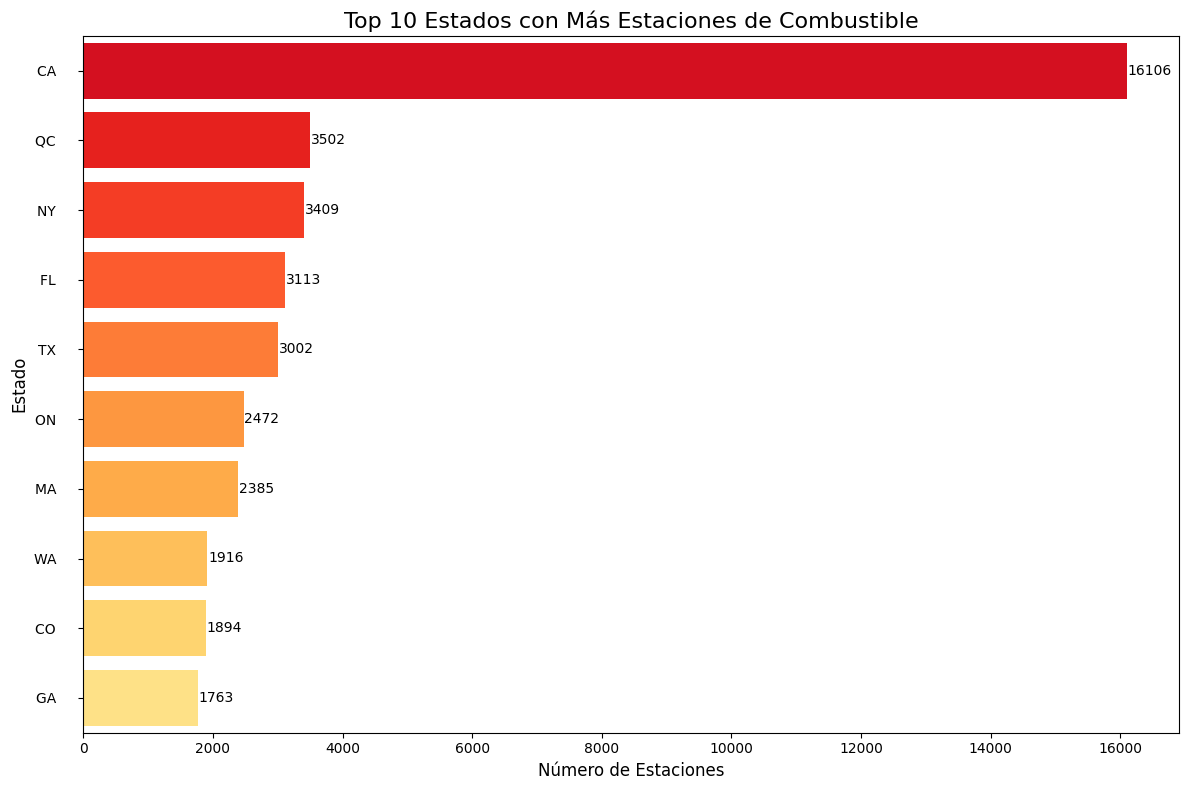

In [31]:
top_10_states = state_counts.nlargest(10)

plt.figure(figsize=(12, 8))
top_10_states_sorted = top_10_states.sort_values(ascending=True)
ax = top_10_states_sorted.plot(kind='barh')

plt.title('Top 10 Estados con Más Estaciones de Combustible', fontsize=16)
plt.xlabel('Número de Estaciones', fontsize=12)
plt.ylabel('Estado', fontsize=12)
colors = plt.cm.YlOrRd(np.linspace(0.2, 0.8, len(top_10_states_sorted)))
for i, (state, value) in enumerate(top_10_states_sorted.items()):
    ax.barh(state, value, color=colors[i])

for i, v in enumerate(top_10_states_sorted):
    ax.text(v + 10, i, str(v), va='center')
plt.tight_layout()plt.show()

En el gráfico podemos observar que el estado de California (CA) es el primero en el ranking con más estaciones de combustible. 
Lo sigue Quebec (Provincia de Cánada) en el segundo puesto y **Nueva York** es el tercero con un total de **3409** estaciones de combustible.

*Gráfico de barras:*

Representa la cantidad de **Estaciones segun el tipo de combustible**

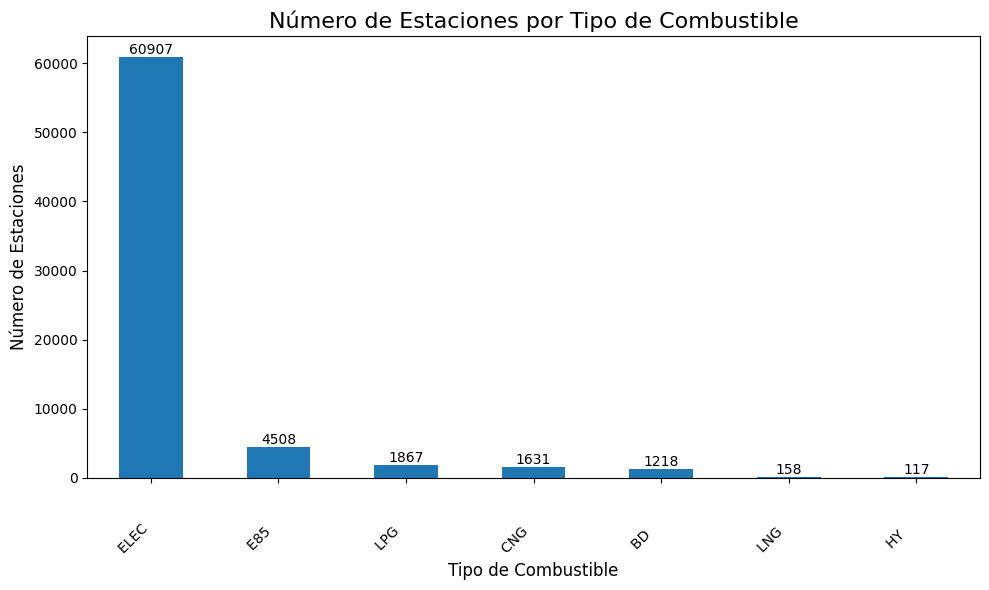

In [32]:
fuel_type_counts = df['Fuel Type Code'].value_counts()

plt.figure(figsize=(10, 6))
fuel_type_counts.plot(kind='bar')
plt.title('Número de Estaciones por Tipo de Combustible', fontsize=16)
plt.xlabel('Tipo de Combustible', fontsize=12)
plt.ylabel('Número de Estaciones', fontsize=12)
plt.xticks(rotation=45)
for i, v in enumerate(fuel_type_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()

El combustible electrico es el tipo más presente en la mayoria de los estados.

---------------------------------------------------------------------------------------------------------------------------------------------
# Análisis de Nueva York

Verificamos los valores únicos de la columna 'State'

In [41]:
print(df['State'].unique()) 

['AL' 'GA' 'AR' 'MA' 'NY' 'IN' 'WY' 'CT' 'LA' 'NM' 'KS' 'ID' 'MO' 'TX'
 'UT' 'MN' 'NE' 'CO' 'OR' 'OK' 'PA' 'CA' 'FL' 'SC' 'NC' 'AZ' 'NV' 'VA'
 'MD' 'WA' 'TN' 'SD' 'IA' 'IL' 'MI' 'ND' 'NJ' 'MS' 'OH' 'MT' 'RI' 'NH'
 'WV' 'WI' 'HI' 'VT' 'AK' 'ME' 'KY' 'DC' 'DE' 'AB' 'QC' 'MB' 'SK' 'ON'
 'BC' 'NL' 'PE' 'NB' 'NS' 'NT' 'YT' 'PR' 'MX']


Vamos a eliminar los espacios en blanco al principio y final de la columna 'State'

In [39]:
df['State'] = df['State'].str.strip()  



**Vamos a inspeccionar qué ciudades pertenecen al estado de Nueva York (NY)**

In [80]:
#Filtramos las ciudades donde el estado es 'NY'
ny_cities = df[df['State'] == 'NY']['City'].unique()
print(ny_cities)


['Brooklyn' 'New York' 'Bronx' 'Rye' 'Queens' 'Brentwood' 'Hicksville'
 'Menands' 'Garden City' 'Monticello' 'Buffalo' 'Riverhead'
 'Valley Stream' 'Rochester' 'Oyster Bay' 'Troy' 'Flushing'
 'Niagara Falls' 'Massapequa' 'Schenectady' 'Irvington' 'Lindenhurst'
 'Trumansburg' 'Albany' 'Bedford Hills' 'Syracuse' 'Newburgh' 'Larchmont'
 'West Nyack' 'Croton-on-Hudson' 'Point Lookout' 'Wyandanch' 'Yaphank'
 'Calverton' 'Congers' 'Water Mill' 'Kings Park' 'Commack' 'Glenmont'
 'Melville' 'Southfields' 'Patchogue' 'Rockville Centre' 'Rocky Point'
 'Bridgehampton' 'Islandia' 'Eastport' 'Farmingville' 'Bellmore'
 'Greenlawn' 'Mt. Sinai' 'Selden' 'New Hyde Park' 'New Rochelle'
 'Westfield' 'East Northport' 'Fort Edward' 'Geneva' 'Oneonta'
 'Orchard Park' 'Plattsburgh' 'Port Chester' 'St. James' 'Syosset'
 'Vestal' 'Wappingers Falls' 'Webster' 'Westbury' 'Williamsville'
 'Yorktown Heights' 'Amherst' 'Auburn' 'Bayside' 'Blauvelt' 'Cicero'
 'East Rochester' 'Inwood' 'Ithaca' 'Jamaica' 'Johnstown' 

Modificamos los espacios dentro de 'City'

In [79]:
df['City'] = df['City'].str.strip()  

*Gráfico de dispersión (scatter plot):*

Representa el **Top 10 ciudades de Nueva York con más estaciones de servicio**

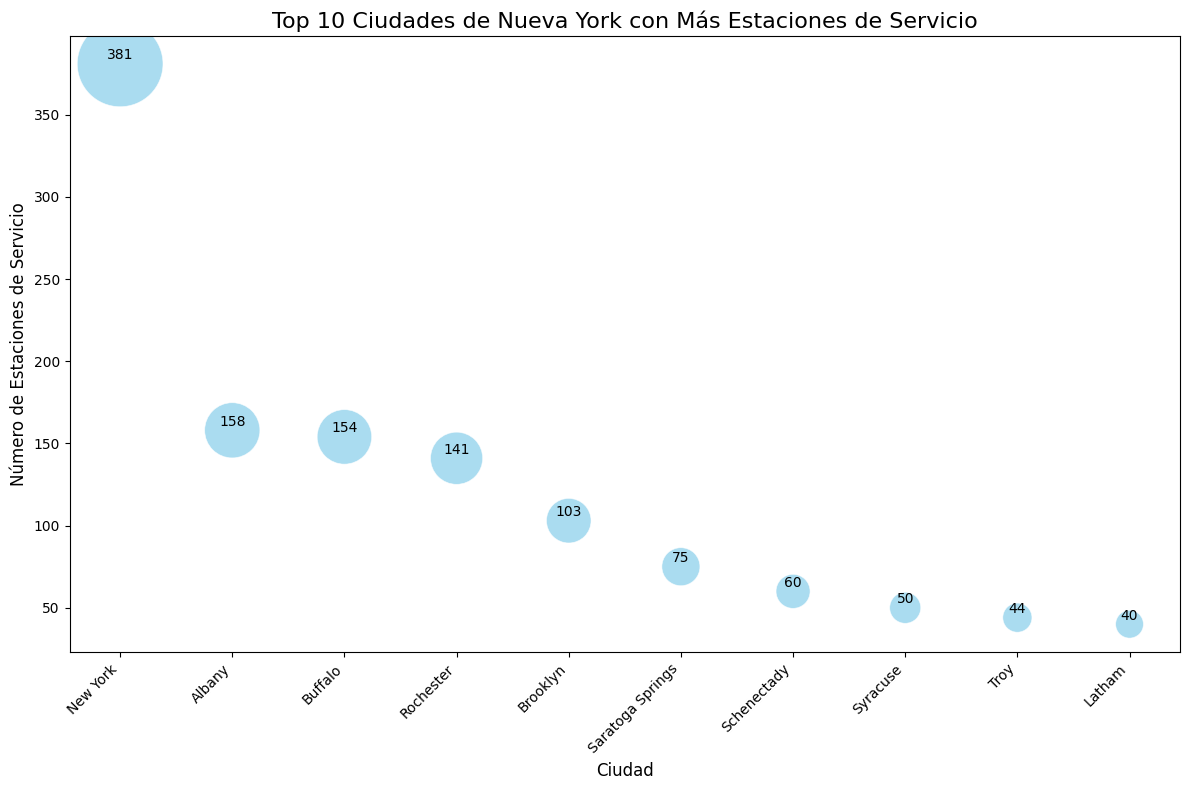

In [86]:
ny_data = df[df['State'] == 'NY']

city_counts = ny_data['City'].value_counts()

top_10_cities = city_counts.head(10)

plt.figure(figsize=(12, 8))
plt.scatter(top_10_cities.index, top_10_cities.values, s=top_10_cities.values * 10, color='skyblue', alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Top 10 Ciudades de Nueva York con Más Estaciones de Servicio', fontsize=16)
plt.xlabel('Ciudad', fontsize=12)
plt.ylabel('Número de Estaciones de Servicio', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(top_10_cities.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.show()


Podemos observar que la ciudad de Nueva York lidera en cuanto a cantidad de estaciones de servicio con un total de 381.

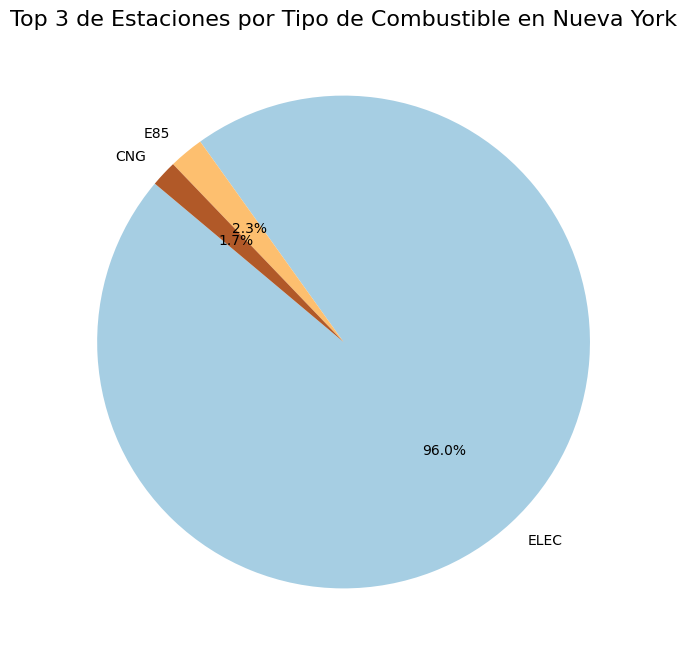

Fuel Type Code
ELEC    3235
E85       77
CNG       58
Name: count, dtype: int64


In [87]:
ny_fuel_type_top3 = ny_fuel_type_counts.nlargest(3)

plt.figure(figsize=(8, 8))
plt.pie(ny_fuel_type_top3, labels=ny_fuel_type_top3.index, autopct='%1.1f%%', startangle=140, 
        colors=plt.cm.Paired(np.linspace(0, 1, len(ny_fuel_type_top3))))
plt.title('Top 3 de Estaciones por Tipo de Combustible en Nueva York', fontsize=16)
plt.show()
print(ny_fuel_type_top3)



El combustible más predominante en el estado de Nueva York es la energía eléctrica con un 96%. Esta tendencia es alentadora para la empresa y respalda su iniciativa de transición hacia una flota de taxis eléctricos.